# Chapter 8: The Fourier Transform

Introduction of discrete Fourier transform as well as the efficient Fast Fourier Transform (FFT) algorithm.
\begin{align}
\psi(x,t) =& \frac{1}{\sqrt{2\pi\hbar}}\int_{-\infty}^{\infty} \phi(p,t)e^{ipx/\hbar} dp \\
\phi(p,t) =& \frac{1}{\sqrt{2\pi\hbar}}\int_{-\infty}^{\infty} \psi(x,t)e^{-ipx/\hbar} dp \\
\end{align}

Things to consider: 

- discretized the system to replace the continuous function $\psi(x,t)$ and $\phi(p,t)$ with discretized functions. 
- infinite domain of integration

FT provides a relationship between: 
1. x and k (or p)
2. t and  $\omega$ (or E).

Using deBroglie equation: $p=\hbar k$, FT can be written in terms of x and k: 
\begin{align}
\psi(x,t) =& \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \phi(k,t)e^{ikx} dk \\
\phi(k,t) =& \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \psi(x,t)e^{-ikx} dx \\
\end{align}

Let's limit the domain of the integration by pacifying the infinities such that: $-x_{max} \leq x \leq x_{max}$ and $-k_{max}\leq k \leq k_{max}$
\begin{align}
\psi(x,t) \approx & \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \phi(k,t)e^{ikx} dk \rightarrow \psi_n = \frac{\triangle x}{\sqrt{2\pi}} \Sigma_{m=0}^{N-1} \phi_m e^{ik_m x_n} \\
\phi(k,t) \approx & \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \psi(x,t)e^{-ikx} dx \rightarrow \phi_n = \frac{\triangle k}{\sqrt{2\pi}} \Sigma_{n=0}^{N-1} \psi_n e^{-ik_m x_n} \\ \\
\end{align}


## Momentum space sampling: 
For a consistent approximation the following condition must be satisfied: 
\begin{equation}
\triangle x \triangle k = \frac{2\pi}{N}
\end{equation}
Note: in effect, the more closely we sample our wavefunction in position space, the more distant our sampling is in momentum space. Choosing $\triangle x$ is therefore a careful balancing act --- we want it to be small enought to accurately represent our wavefunction, but large enough so that we also accurately sample the resulting discretized Fourier transform. How do we do this?

## The Nyquist Theorem
If one knows in advance a particular value of $k_{max}$ such that, for all $|k_m| > |k_{max}|,|\phi(k_m)=0|$. In such a case, we can see from the Nyquist momentum that we simply need to choose: 
\begin{equation}
\triangle x \leq \frac{\pi}{k_max}
\end{equation}
This is referred to as the Nyquist theorem, or the Nyquist condition, and is the crux of the Nyquist-Shannon sampling theorem. 


In [17]:
# Example 8.2: Discretized Fourier transform (Python)
import numpy as np
import matplotlib.pyplot as plt
'''
Use Fourier differentitation to find the momentum-space representation \phi_k of the wavefunction \psi(x) = exp(-x**2/2)x
sin(4x) over the domain -5<= x <= 5 with N=201 discretized points. 
'''
# define the properties
N = 201 
a = (N-1)/2 
dx = (5-(-5))/(N-1)

# define the x-grid and discretized wavefunctions 
x = np.arange(-5,5+dx,dx)
psi = np.exp(-(x**2)/2)*np.sin(4*x)

# define the k-grid 
dk = 2*np.pi/N*dx
kmax = np.pi/dx 
k  = np.arange(-kmax,kmax,dk)

# the 2-dimensional Fourier matrix using broadcasting
n = np.arange(N).reshape((-1,1))
m = np.arange(N).reshape((1,-1))
W = np.exp(-2j*np.pi*(m-a)*(n-a)/N)

# perform the discretized Fourier algorithm 
# psi is indexed by n 
psi = psi.reshape(-1,1)

# sum over n axis 
phi = np.sum(psi*W, axis=0)*dk/(np.sqrt(2*np.pi))

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


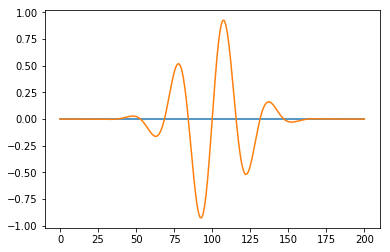

In [19]:
plt.plot(psi)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


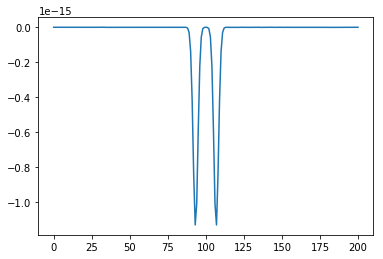

In [20]:
plt.plot(phi)

In [23]:
type(psi[0])

numpy.ndarray